In [1]:
import kchannel

In [2]:
coor = "/home/tom/projects/markov/sims/MthK/amber/start.gro"
trajs = ["/home/tom/projects/markov/sims/MthK/amber/0/wrap.xtc", 
         "/home/tom/projects/markov/sims/MthK/amber/1/wrap.xtc"]

In [3]:
_ = kchannel.detectSF(coor)

idx	layer	chain	resid	resname	name
756	4	0	59	THR	OG1
2209	4	1	59	THR	OG1
3662	4	2	59	THR	OG1
5115	4	3	59	THR	OG1
759	3	0	59	THR	O
2212	3	1	59	THR	O
3665	3	2	59	THR	O
5118	3	3	59	THR	O
779	2	0	60	VAL	O
2232	2	1	60	VAL	O
3685	2	2	60	VAL	O
5138	2	3	60	VAL	O
786	1	0	61	GLY	O
2239	1	1	61	GLY	O
3692	1	2	61	GLY	O
5145	1	3	61	GLY	O
807	0	0	62	TYR	O
2260	0	1	62	TYR	O
3713	0	2	62	TYR	O
5166	0	3	62	TYR	O


In [4]:
for traj in trajs:
    _ = kchannel.run(coor, traj, CADistance=True, ignoreS0ScavJump=True)

Reading trajectory
Finished processing frame 25000 / 25001 
Double occupancy is found in 5 frames. Check log file for details.
Total time: 500.000000 ns
dt: 0.020000 ns
Number of K+: 148
Number of water: 7272
Number of net water permeation = 0
Number of net ion permeation = 52
Current = 16.66080 pA
Results saved to /home/tom/projects/markov/sims/MthK/amber/0/results.csv
Log saved to /home/tom/projects/markov/sims/MthK/amber/0/results.log
Total execution time: 52.03540 s


Reading trajectory
Finished processing frame 25000 / 25001 
Double occupancy is found in 8 frames. Check log file for details.
Total time: 500.000000 ns
dt: 0.020000 ns
Number of K+: 148
Number of water: 7272
Number of net water permeation = 0
Number of net ion permeation = 45
Current = 14.41800 pA
Results saved to /home/tom/projects/markov/sims/MthK/amber/1/results.csv
Log saved to /home/tom/projects/markov/sims/MthK/amber/1/results.log
Total execution time: 55.31997 s




In [6]:
# location of the directories containing the trajectories
locations = ["/home/tom/projects/markov/sims/MthK/amber/0",
             "/home/tom/projects/markov/sims/MthK/amber/1"
            ]
channel = kchannel.loadResults(locations)
stats_df, states_df = kchannel.computeStats(channel, save='stats.csv')
stats_df

Current (pA): 15.539	14.418 - 15.539

Stats saved to /hdd/projects/markov/softs/kchannel/stats.csv


,T (ns),dt (ns),current (pA),WKK0KW,C0KK0C,WK0KKW,C0KKWC,CK0KKW,WKK0KC,C0K0KW,...,KK0KKW,WC0K0C,K0KKWW,K0KK0W,CC0KWC,W0KKWW,C0KKKC,K0KKKW,CWKK0W,WKK0KK
0,500.0,0.02,16.6608,0.398104,0.231671,0.088556,0.048158,0.063757,0.054758,0.034919,...,0.00012,0.00004,0.00000,0.00000,0.00004,0.00000,0.00004,0.00000,0.00000,0.00004
1,500.0,0.02,14.4180,0.341586,0.280349,0.084237,0.066197,0.041318,0.036119,0.030039,...,0.00004,0.00008,0.00008,0.00008,0.00000,0.00004,0.00000,0.00004,0.00004,0.00000


33-th cycle between is discarded as WKK0KW is not found
34-th cycle between is discarded as WKK0KW is not found
Total permeation events: 52
Identified cycles: 49
Total permeation events: 45
Identified cycles: 44


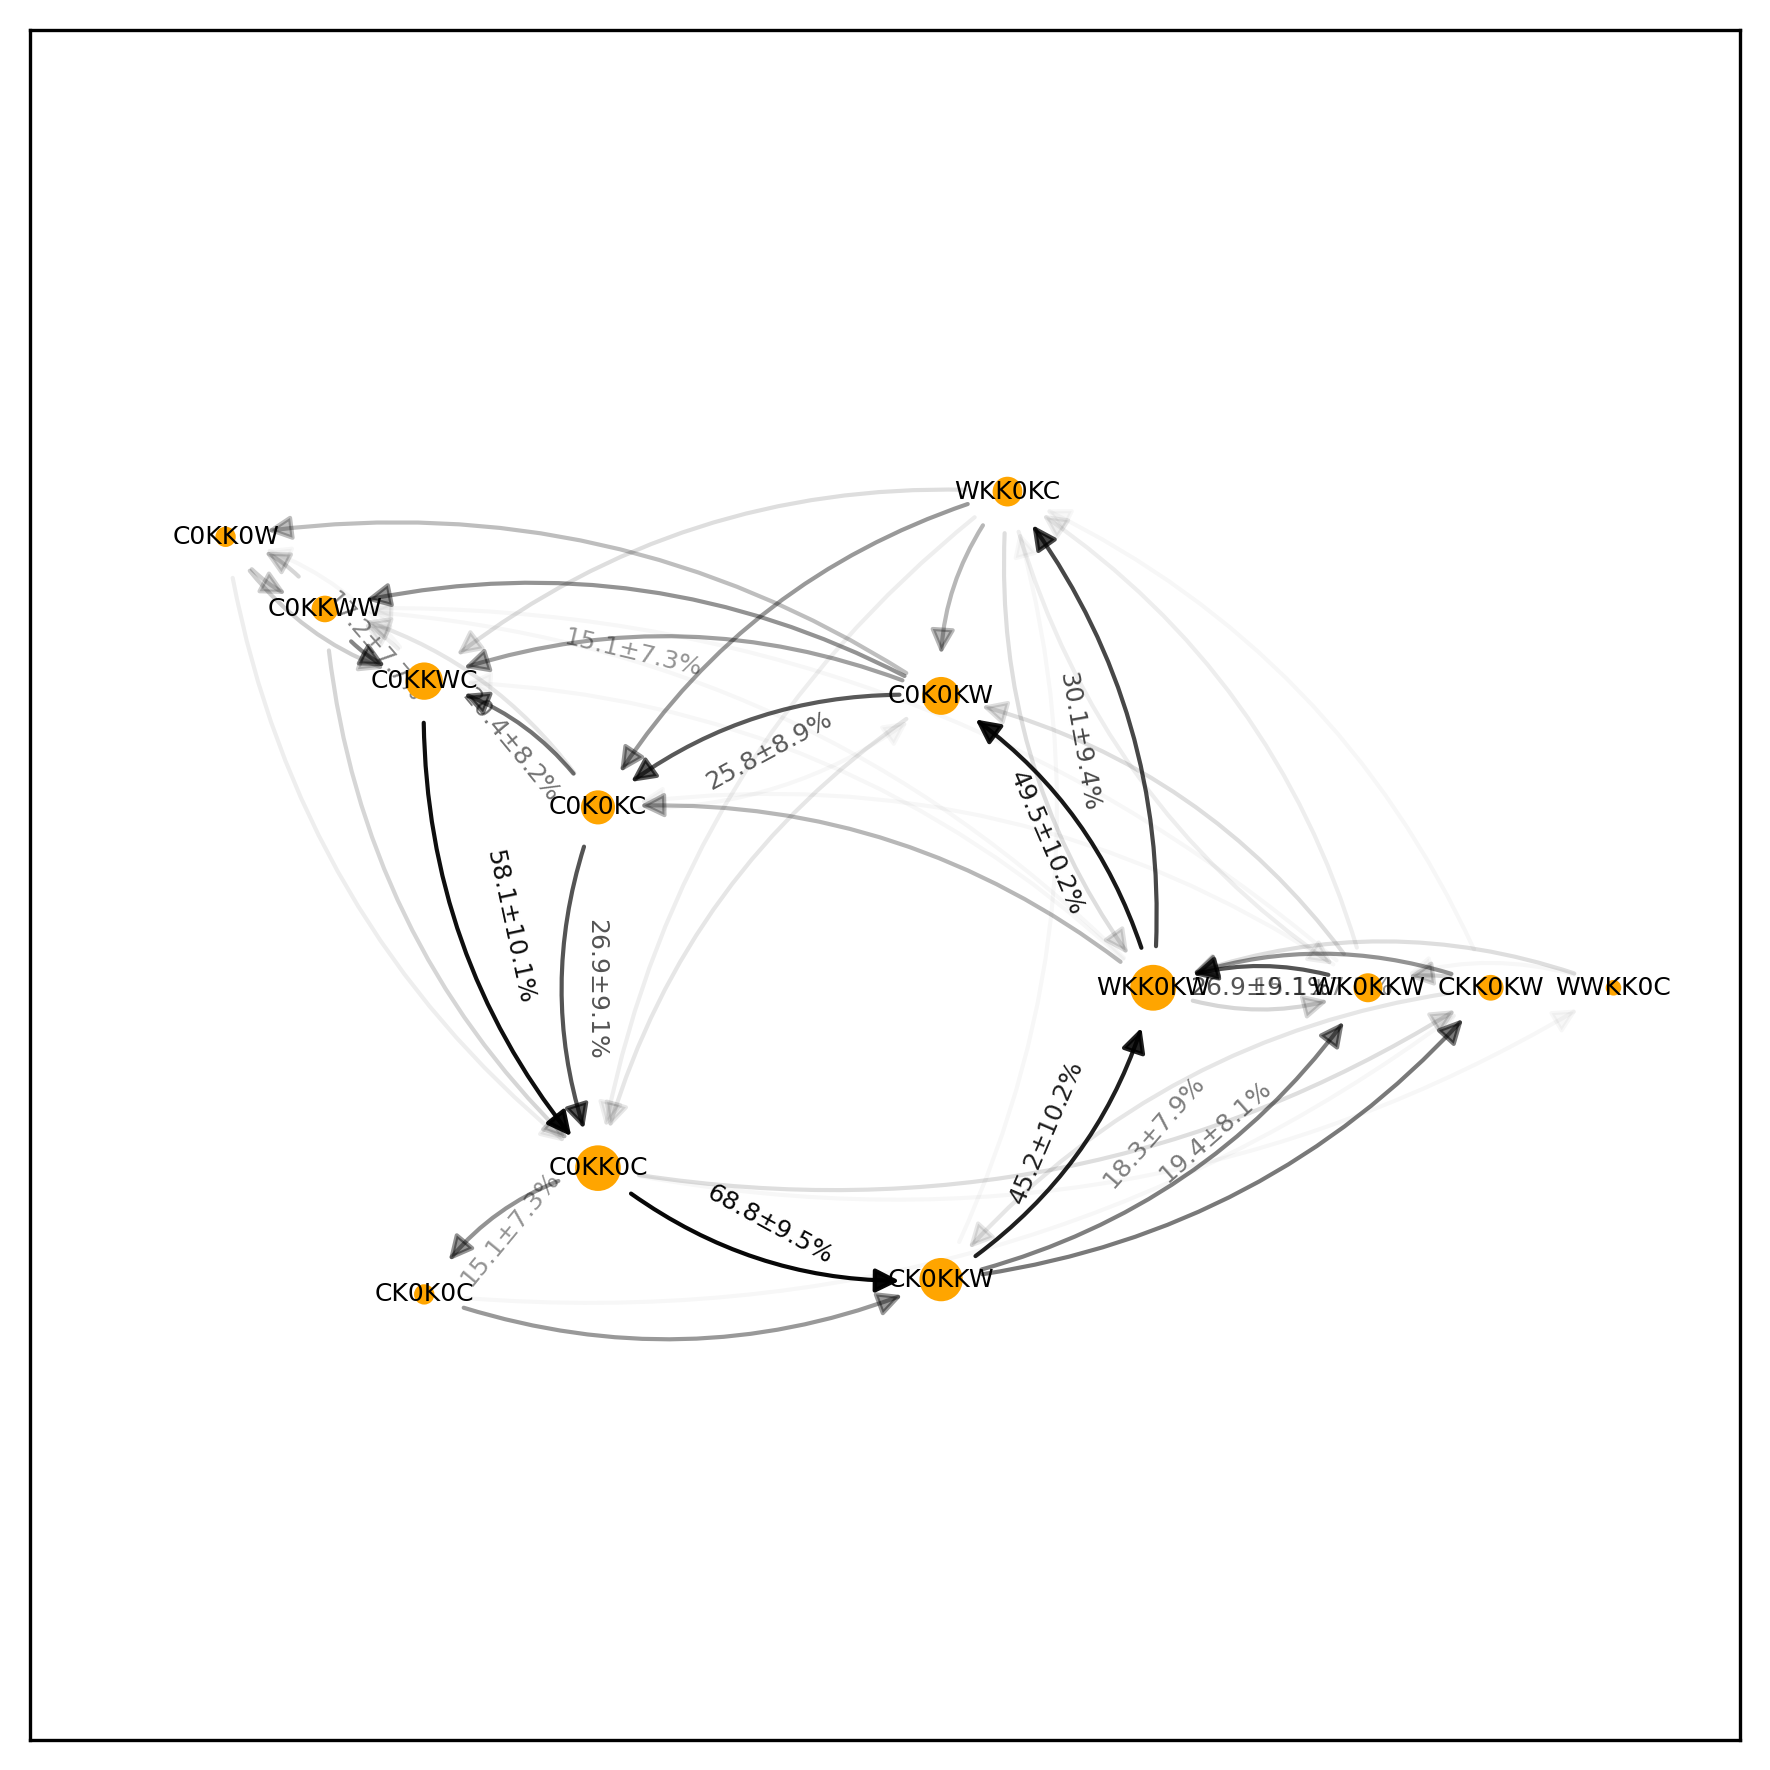

,initial,final,mean (ns),low (ns),high (ns),n,k_f,w_f
0,WKK0KW,C0K0KW,1.235822,1.104298,1.405561,383,1.0,0.0
1,C0K0KW,C0K0KC,1.333333,1.057024,1.679530,168,0.0,0.0
2,C0K0KC,C0KK0C,3.472754,2.286330,5.457714,69,1.0,0.0
3,C0KK0C,CK0KKW,2.082162,1.754324,2.525207,148,2.0,0.0
4,CK0KKW,WKK0KW,1.701802,1.243604,2.515213,111,1.0,0.0


In [7]:
channel.cycles_6_all, _ = kchannel.findCycles(channel.occupancy_6_all, channel.jumps_all, 'WKK0KW', n_bs_jump=4)
cycleProbs_6, mainPath = kchannel.plotCycles(channel.cycles_6_all, state_threshold=.01, 
                                  label_threshold=0.15, offset=0.7, scale=0.4, figsize=(6,6),
                                  returnCycleProb=True, returnMainPath=True)
df = kchannel.permeationMFPT(channel.occupancy_6_all, channel.jumps_all, mainPath, n_bs_jump=4)
df